<a href="https://colab.research.google.com/github/xcellentbird/Study-Deep_Learning/blob/main/%EB%86%8D%EC%96%B4_%ED%81%AC%EA%B8%B0_%ED%9A%8C%EA%B7%80(Ridge%2C_Lasso)_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
# 데이터를 불러와 np 배열로 변환한다.
perch_full = pd.read_csv('https://bit.ly/perch_csv').to_numpy()
print(perch_full.shape)

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

(56, 3)


In [33]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight)

In [34]:
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures는 특성을 조합하여 새로운 특성을 만드는 역할을 한다.
# 실행 후 shape를 확인하면 3가지 특성이 9가지 특성으로 늘어난 것을 볼 수 있다.
# 학습셋을 fit한 poly를 이용하여 테스트셋도 transform해야한다
poly = PolynomialFeatures(include_bias = False) # bias(절편)을 사용하지 않는다.
train_poly = poly.fit_transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape, test_poly.shape)

# Polynomial이 특성을 어떻게 조합했는지 볼 수 있다.
poly.get_feature_names()


(42, 9) (14, 9)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [35]:
from sklearn.preprocessing import StandardScaler

# StandardScalar 데이터를 정규화(평균을 빼고, 분산으로 나누는)하는 역할을 한다.
ss = StandardScaler()
train_scaled = ss.fit_transform(train_poly)
test_scaled = ss.transform(test_poly)


In [36]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [ ]:
# 릿지와 라쏘는 모두 특성에 규제를 가함으로서(일부러 과소적합을 유도) 과대적합을 막는 역할을 한다.
# 릿지는 다차항수의 계수를 제곱한 값을 기준으로 규제를 적용하고,
# 라쏘는 계수의 절댓값을 기준으로 규제를 적용합니다.

In [37]:

from sklearn.linear_model import Ridge

# alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합으로 유도
alpha_list = [10**n for n in range(-3, 3)]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target)) # 학습 점수
  test_score.append(ridge.score(test_scaled, test_target)) # 테스트 점수

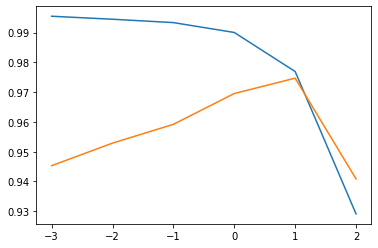

In [38]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

# 차트에서 학습 점수와 테스트 점수가 차이가 나면 과대적합으로 본다.
# 차트에서 학습 점수와 테스트 점수가 모두 낮으면 과소적합으로 본다.

In [41]:
from sklearn.linear_model import Lasso

train_score = []
test_score = []

# alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합으로 유도
# max_iter(반복 횟수)를 올려 warning을 없앨 수 있다.
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter = 1000000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

In [42]:
print(np.sum(lasso.coef_ == 0)) # 몇개의 특성(계수)를 0으로 만들었는지 확인할 수 있다.

7


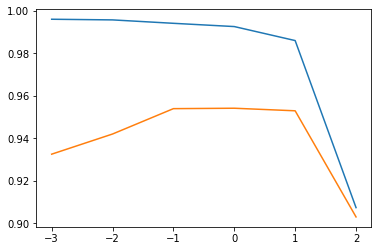

In [40]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [40]:
# +) score(결정계수)내는 원리: R^2 = 1 - ((타깃 - 예측)^2 / (타깃 - 평균)^2))
# score는 높을수록 좋다.